In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt

### Load the data and do some examining

In [2]:
%run PLOTTING_FUNCTIONS.ipynb

In [3]:
%run COSMETICS_DICTIONARIES.ipynb

In [4]:
%run SOME_PREPROCESSING.ipynb

In [5]:
for l in litho_dict.keys():
    print(f'{litho_dict[l][0]:>20}: {df.Z_LOC[df.Z_LOC.notna()][df.FORCE_2020_LITHOFACIES_LITHOLOGY==l].mean():>8.3f}')

           Sandstone: -2178.419
               Shale: -2048.295
     Sandstone/Shale: -2401.462
           Limestone: -2392.575
               Chalk: -1908.655
            Dolomite: -2149.263
                Marl: -2386.500
           Anhydrite: -2516.673
              Halite: -2868.884
                Coal: -2945.276
            Basement: -2867.388
                Tuff: -1629.469


In [6]:
df.GROUP[df.FORCE_2020_LITHOFACIES_LITHOLOGY==93000].unique()

array(['ROTLIEGENDES GP.'], dtype=object)

In [7]:
print(f'{len(df.GROUP)} {len(df[df.GROUP.isna()])}')

1170511 1278


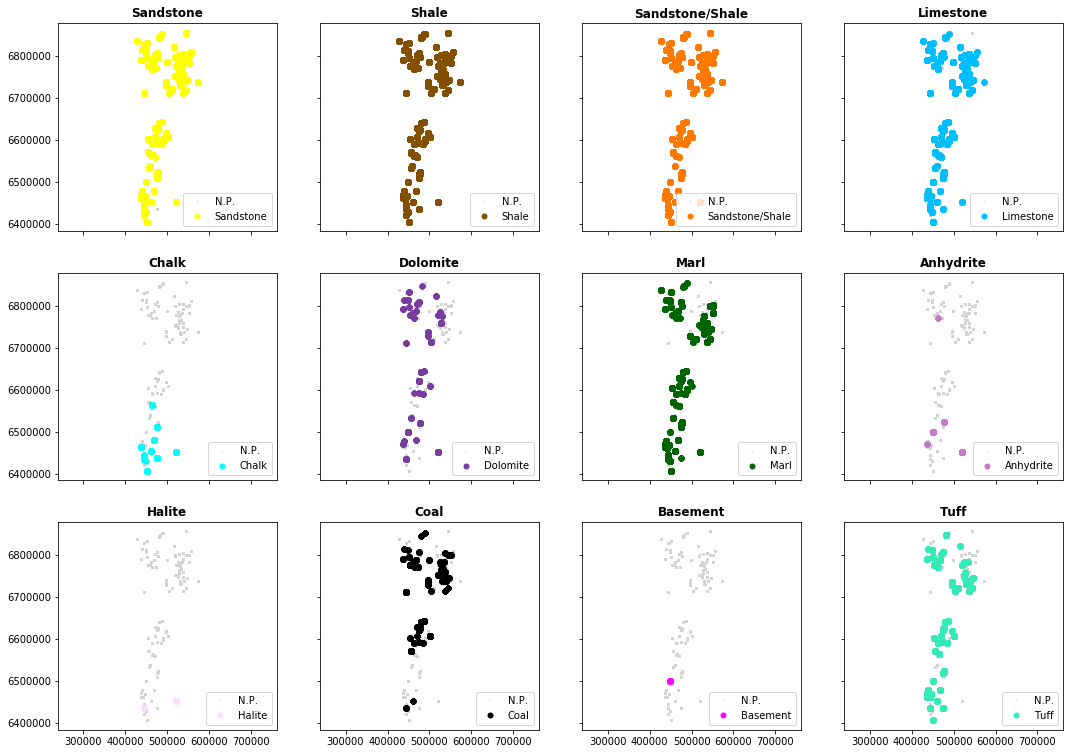

In [8]:
min_UTMx = 0.9*min(df.X_LOC)
max_UTMx = 1.1*max(df.X_LOC)
min_UTMy = 0.9*min(df.Y_LOC)
max_UTMy = 1.1*max(df.Y_LOC)

l = 0
li = sorted(litho_dict.keys())

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(18,13), sharey=True)
for i, ax_rows in enumerate(axes):
    for j, ax_cols in enumerate(ax_rows):
        ax_cols.plot(df.X_LOC,df.Y_LOC, marker='.', markersize=1, color='lightgrey', linewidth=0, label='N.P.')
        ax_cols.plot(df.X_LOC[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li[l]],
                df.Y_LOC[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li[l]],
                color=litho_dict[li[l]][1], marker='.', markersize=10, linewidth=0, label=litho_dict[li[l]][0])

        # only the last row of plots need tickmarks/scales. Y-scale is covered by "sharey=True"
        if i!=2:
            ax_cols.set_xticklabels([]) 

        ax_cols.set_title(litho_dict[li[l]][0],fontweight='bold')
        ax_cols.set_xlim([min_UTMx,max_UTMx])
        ax_cols.set_ylim([min_UTMy,max_UTMy])
        ax_cols.legend(loc='lower right')
        ax_cols.axis('equal')
        l += 1
plt.savefig('spatial_distribution_lithologies.png')
plt.show()

In [9]:
# BS - CALI = DCAL
df.DCAL[df.CALI.isnull()].notna().sum()

137

In [10]:
df.loc[:,['BS','CALI','DCAL']].dropna().head()

,BS,CALI,DCAL
18350,26.000002,19.388424,-6.611575
18351,26.000002,20.066446,-5.933549
18352,26.000002,21.080965,-4.919032
18353,26.000002,21.240883,-4.759112
18354,26.000002,20.646976,-5.353021


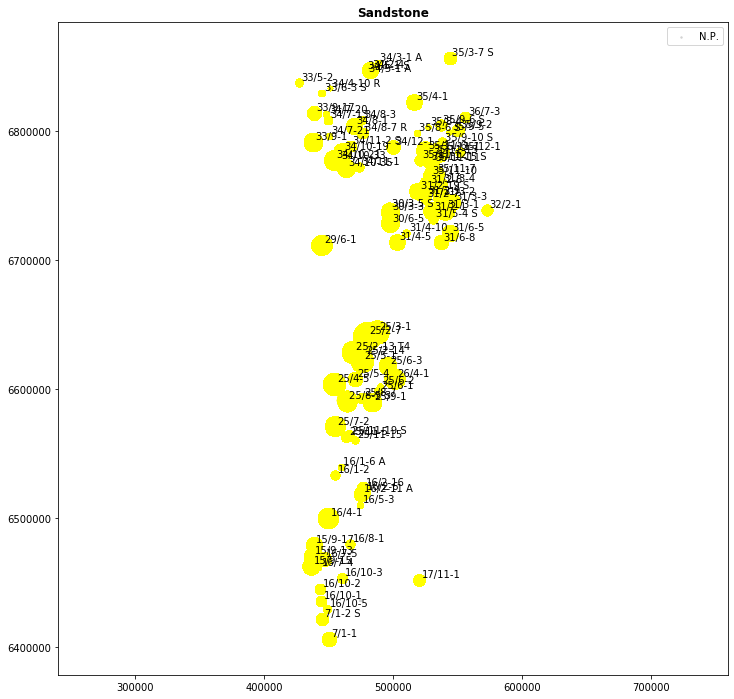

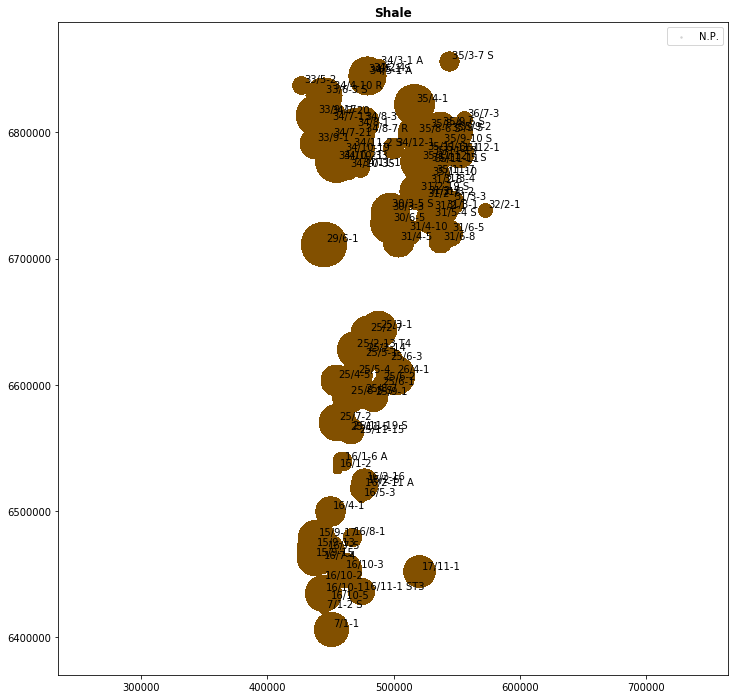

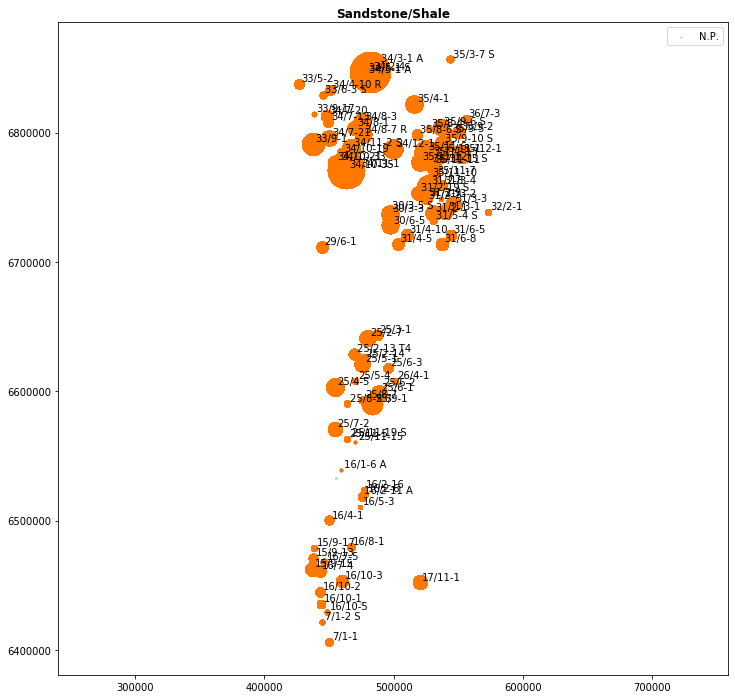

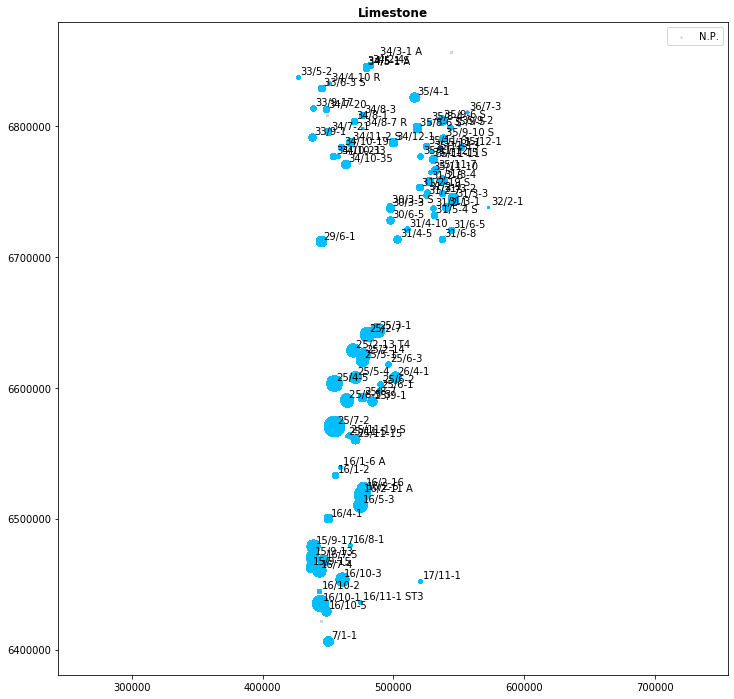

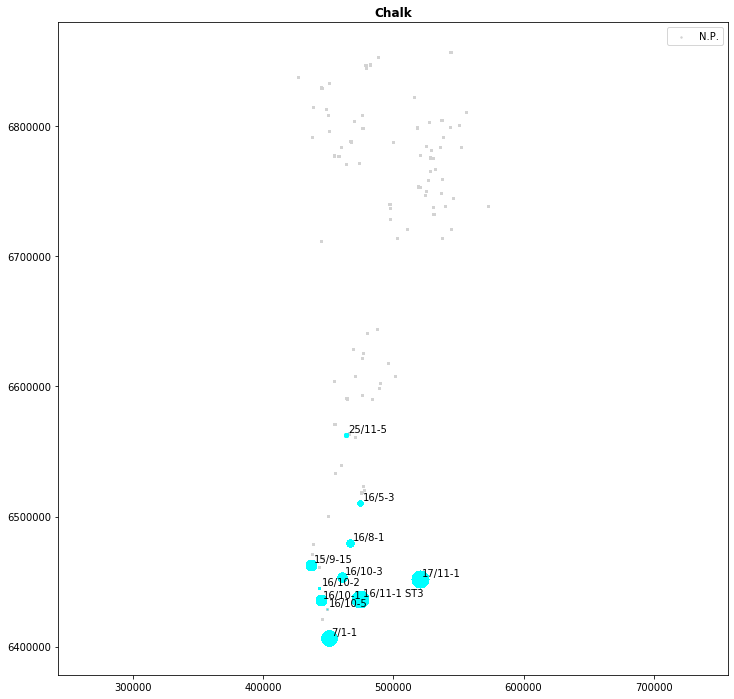

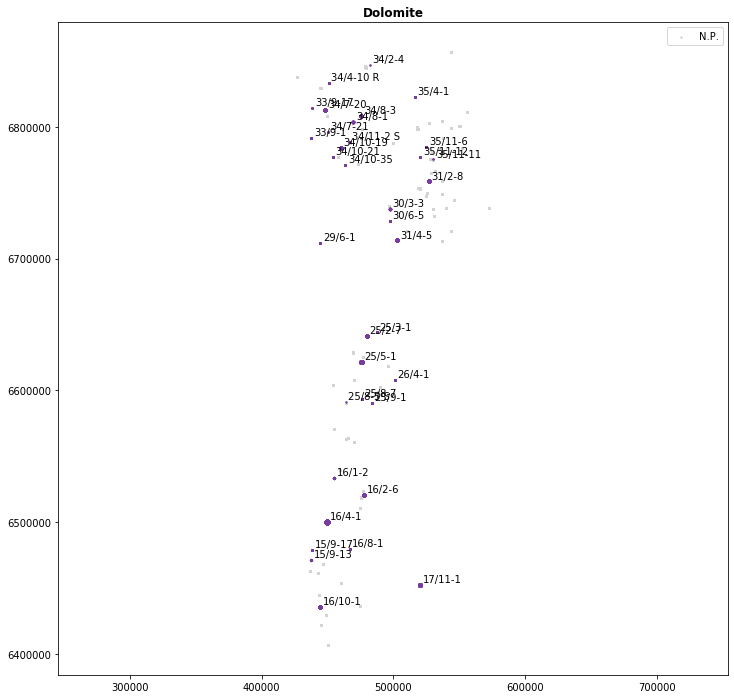

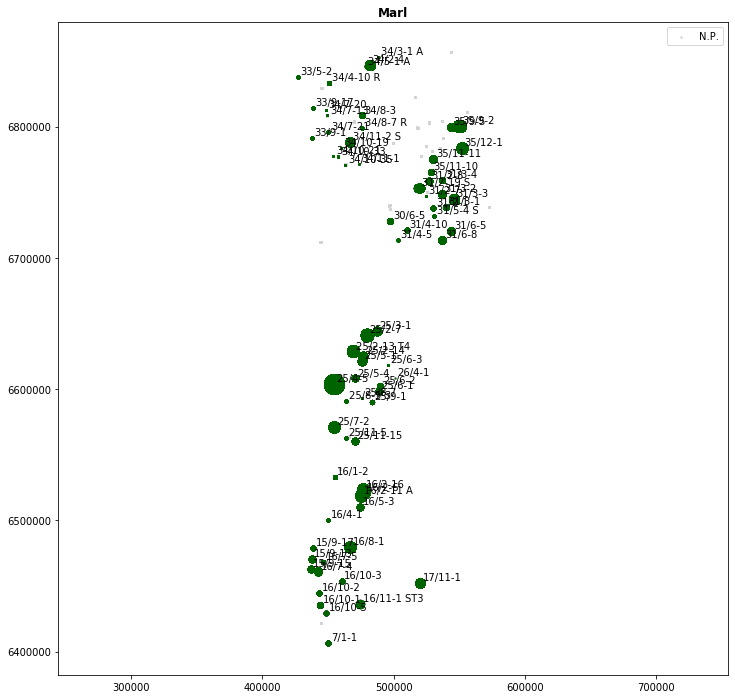

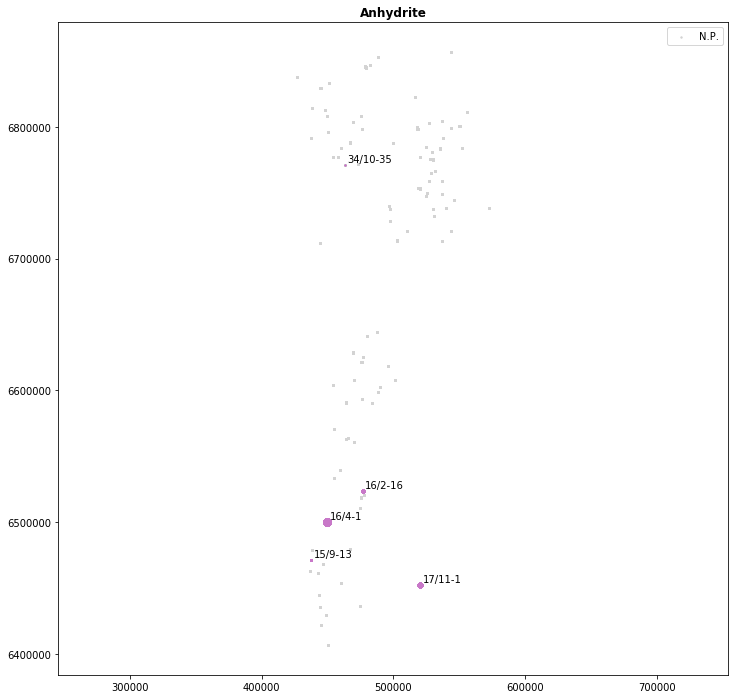

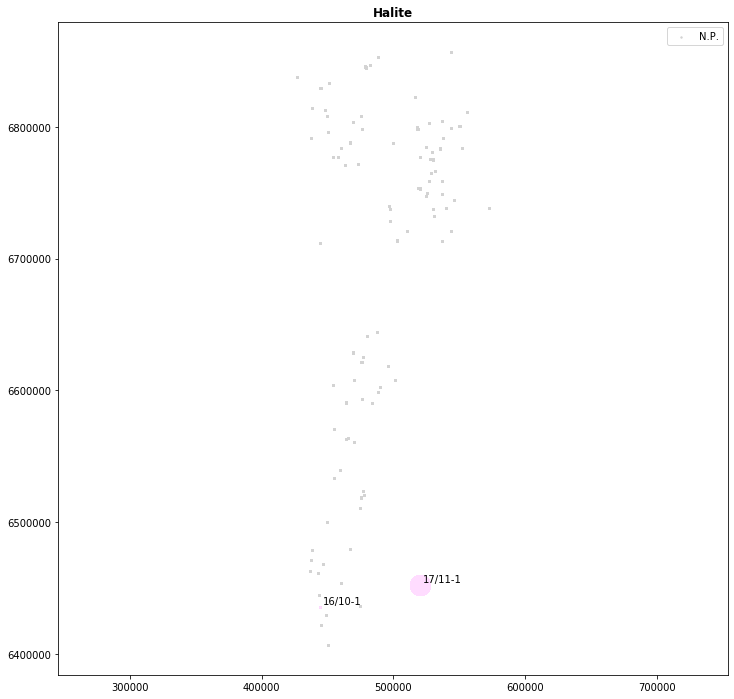

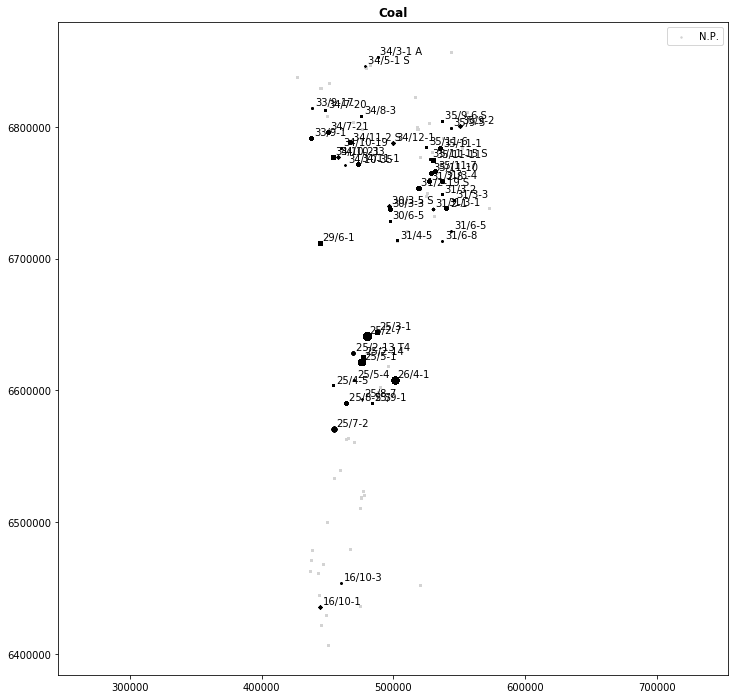

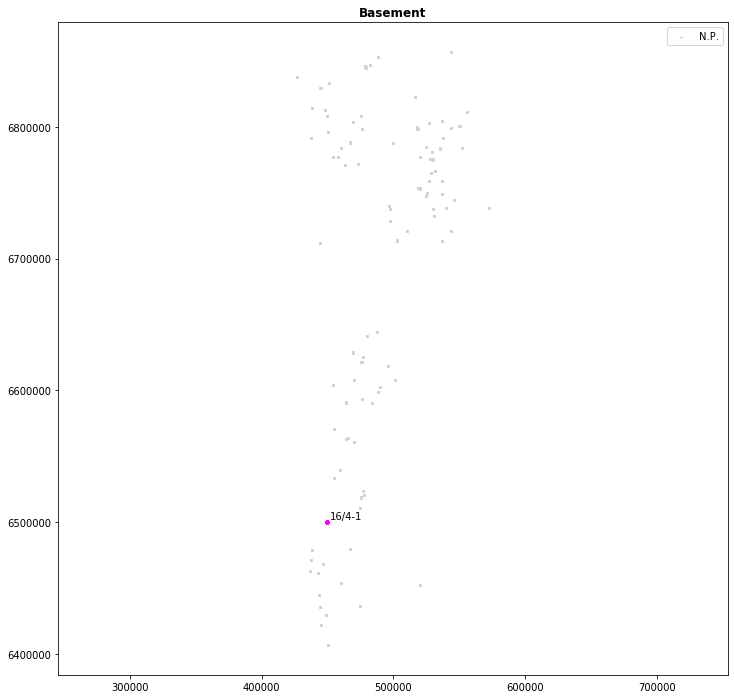

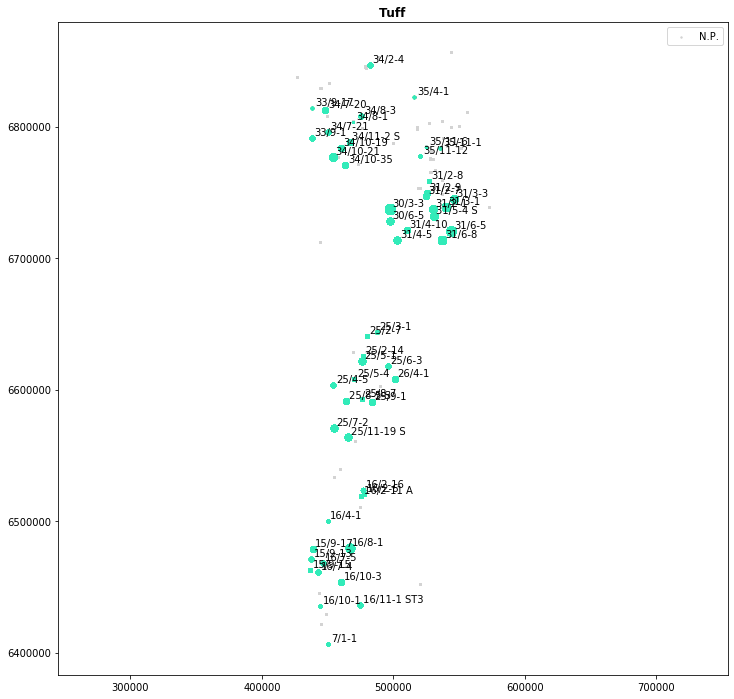

In [11]:
# to make a large plot of a each lithology and annotate wells:
offset=2000

for li in litho_dict.keys():
    fig = plt.figure(figsize=(12,12))
    plt.scatter(df.X_LOC,df.Y_LOC,marker='.',s=8,c='lightgrey',label='N.P.')
    
    for w in df.WELL.loc[(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)].unique():
        plt.scatter(df.X_LOC.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.WELL==w))],
                    df.Y_LOC.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.WELL==w))],
                    c=litho_dict[li][1],s=len(df.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.WELL==w))])/10,
                    label=None) #litho_dict[li][0])
    for w in df.WELL[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li].unique():
        plt.annotate(w,
                     xy=(df.X_LOC.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.WELL==w))].mean()+offset,
                         df.Y_LOC.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.WELL==w))].mean()+offset),
                     xytext=(df.X_LOC.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.WELL==w))].mean()+offset,
                             df.Y_LOC.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.WELL==w))].mean()+offset))
    plt.title(litho_dict[li][0],fontweight='bold')
    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.savefig(f'spatial_distribution_lithologies_{li}.png')
    plt.show()

In [12]:
print('number of wells with each lithology:')
for li in litho_dict.keys():
    print(f'{litho_dict[li][0]:<15}: {len(df.X_LOC.loc[(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)]):>6} \
({(100*len(df.X_LOC.loc[(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)])/len(df)):>4.1f}%, in \
{len(df.WELL.loc[(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)].unique()):>2} wells (or in \
{(100*len(df.WELL.loc[(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)].unique())/len(df.WELL.unique())):>5.1f}% of all wells)')

number of wells with each lithology:
Sandstone      : 168937 (14.4%, in 98 wells (or in 100.0% of all wells)
Shale          : 720803 (61.6%, in 98 wells (or in 100.0% of all wells)
Sandstone/Shale: 150455 (12.9%, in 97 wells (or in  99.0% of all wells)
Limestone      :  56320 ( 4.8%, in 94 wells (or in  95.9% of all wells)
Chalk          :  10513 ( 0.9%, in 11 wells (or in  11.2% of all wells)
Dolomite       :   1688 ( 0.1%, in 37 wells (or in  37.8% of all wells)
Marl           :  33329 ( 2.8%, in 73 wells (or in  74.5% of all wells)
Anhydrite      :   1085 ( 0.1%, in  6 wells (or in   6.1% of all wells)
Halite         :   8213 ( 0.7%, in  3 wells (or in   3.1% of all wells)
Coal           :   3820 ( 0.3%, in 51 wells (or in  52.0% of all wells)
Basement       :    103 ( 0.0%, in  1 wells (or in   1.0% of all wells)
Tuff           :  15245 ( 1.3%, in 55 wells (or in  56.1% of all wells)


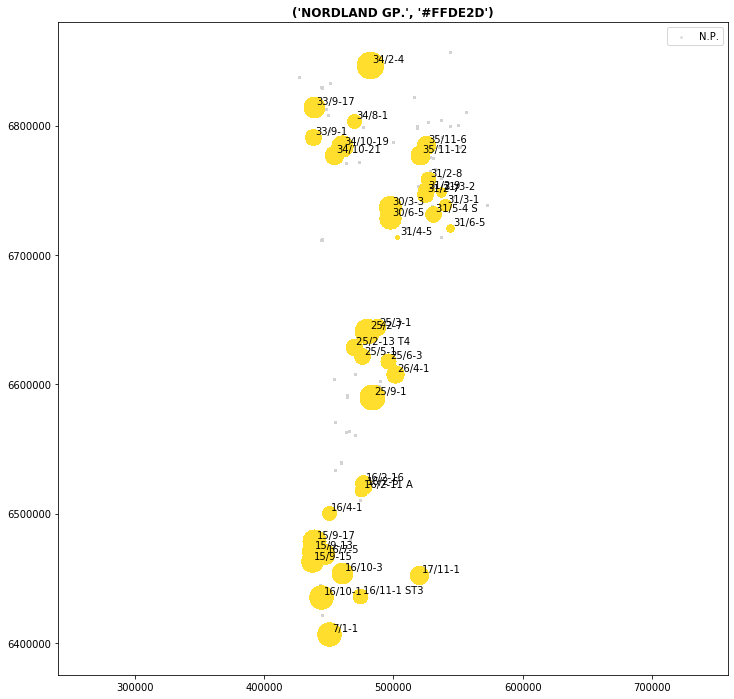

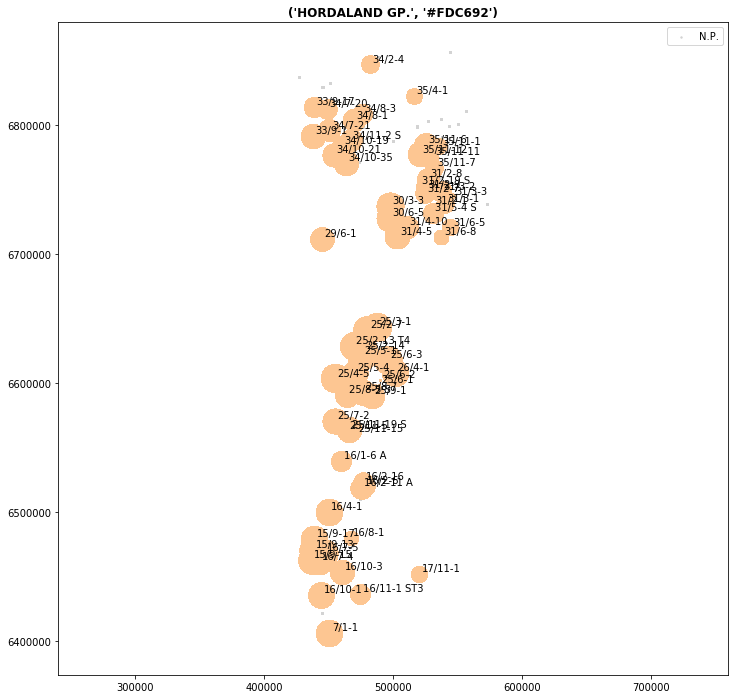

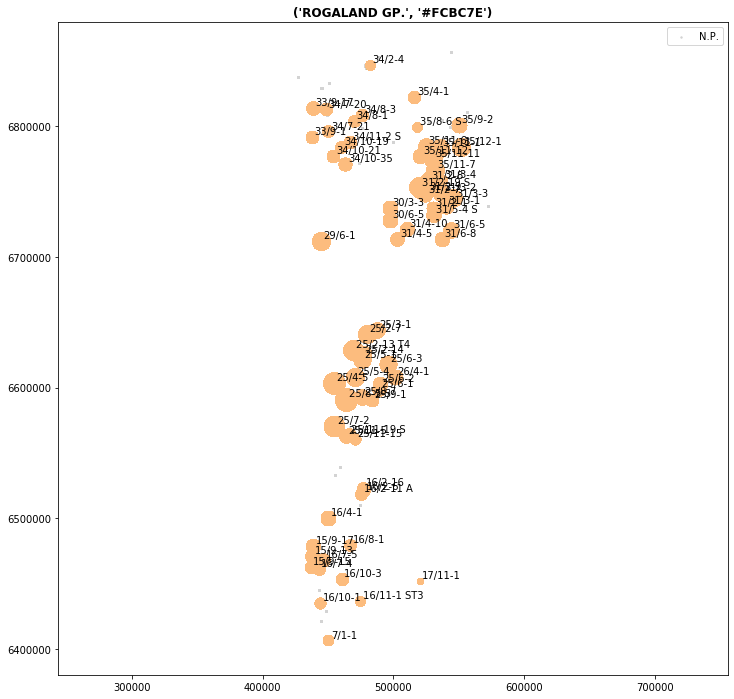

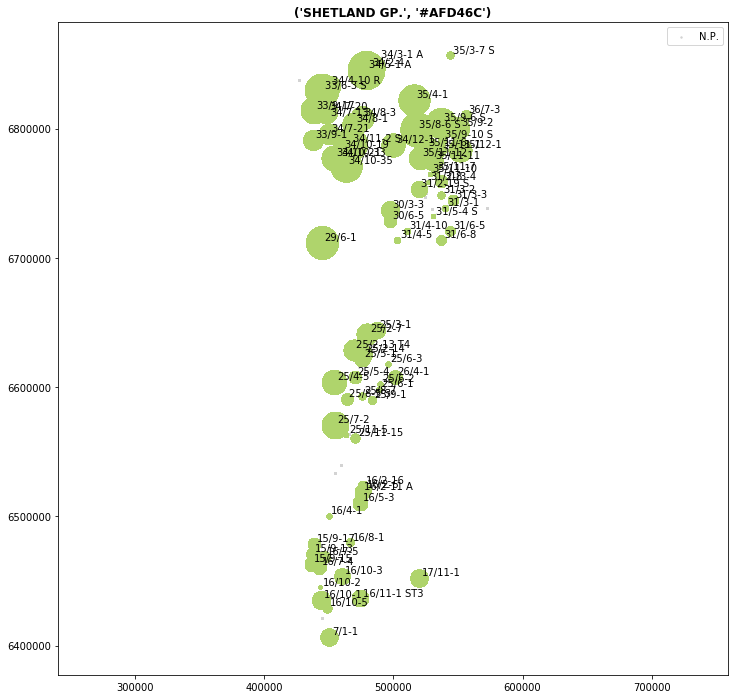

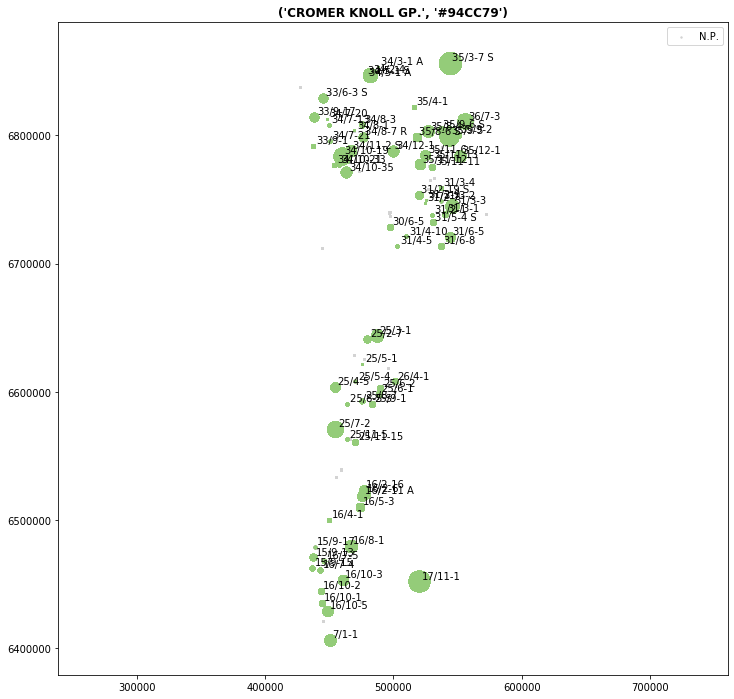

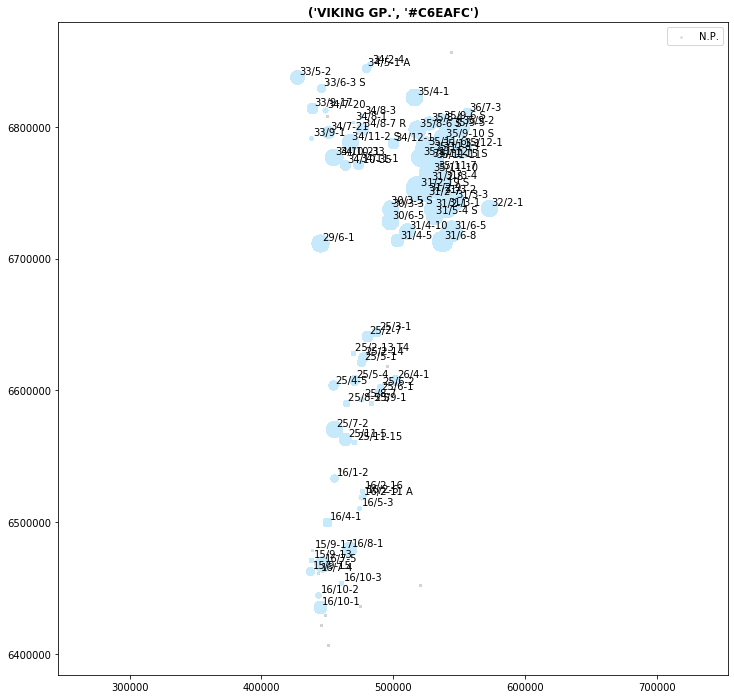

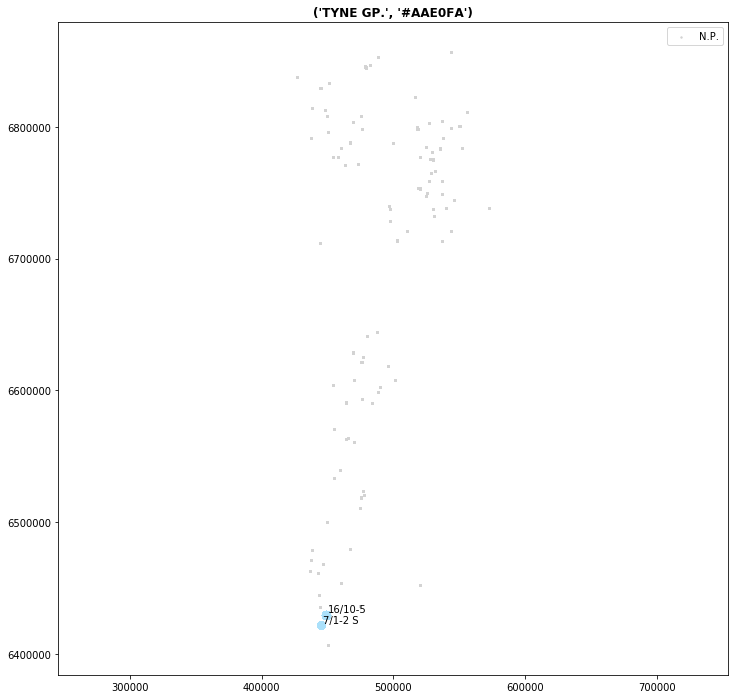

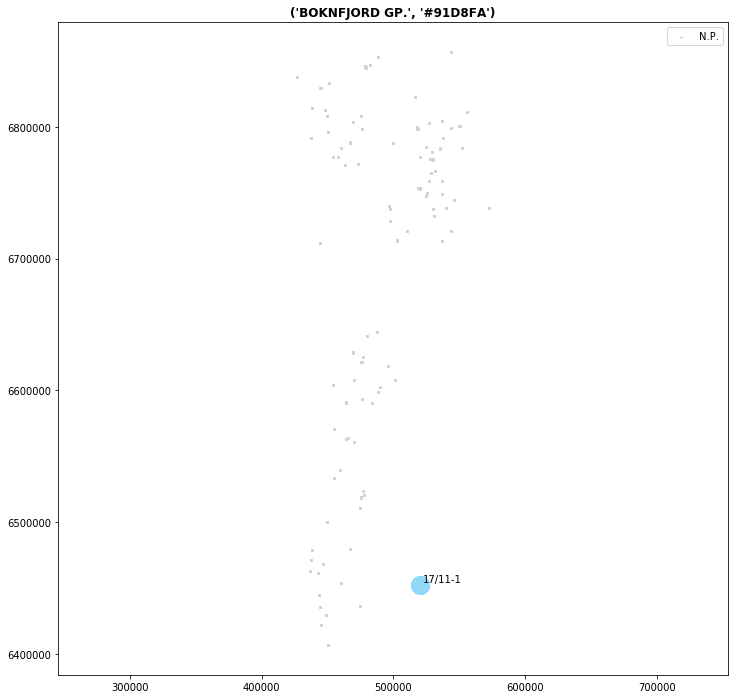

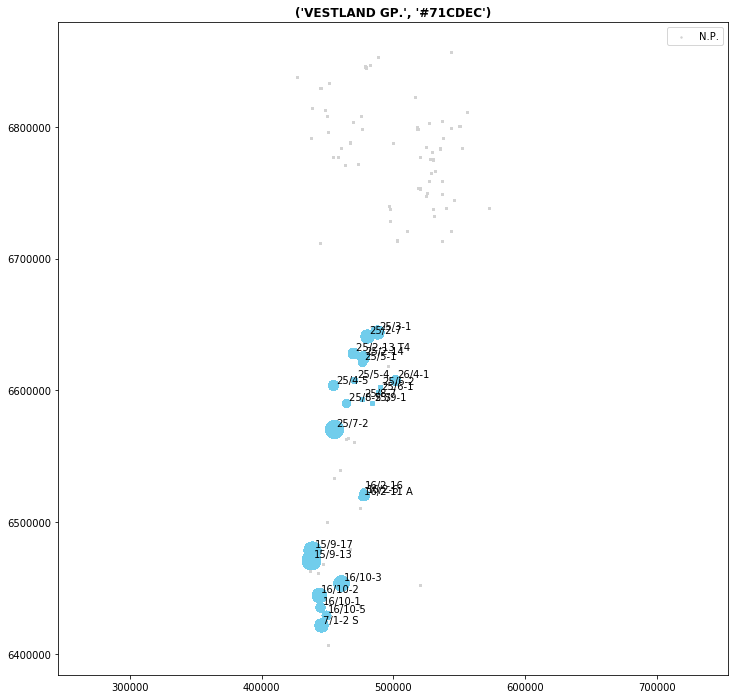

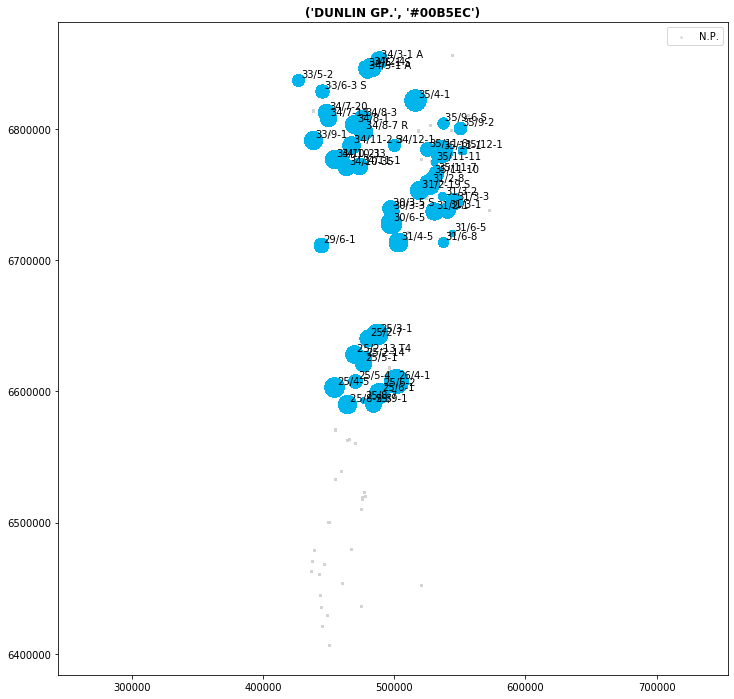

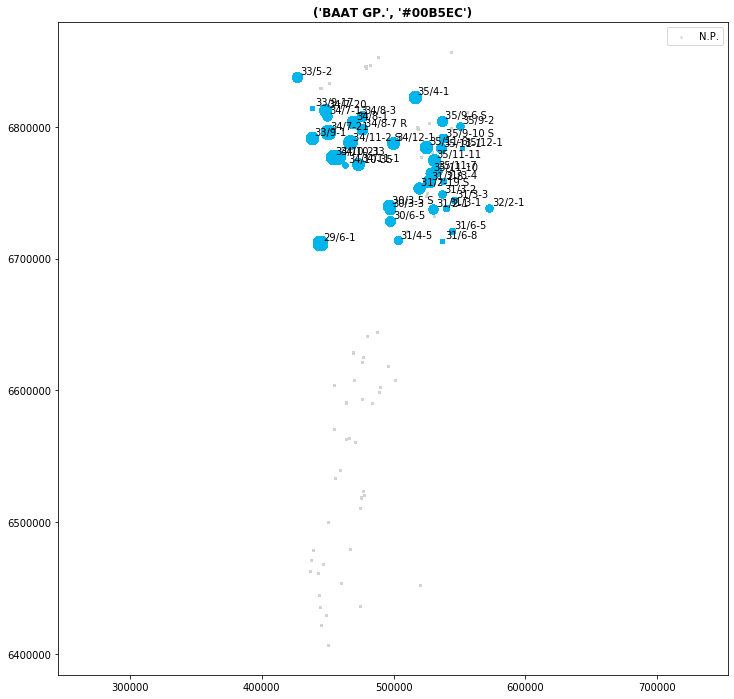

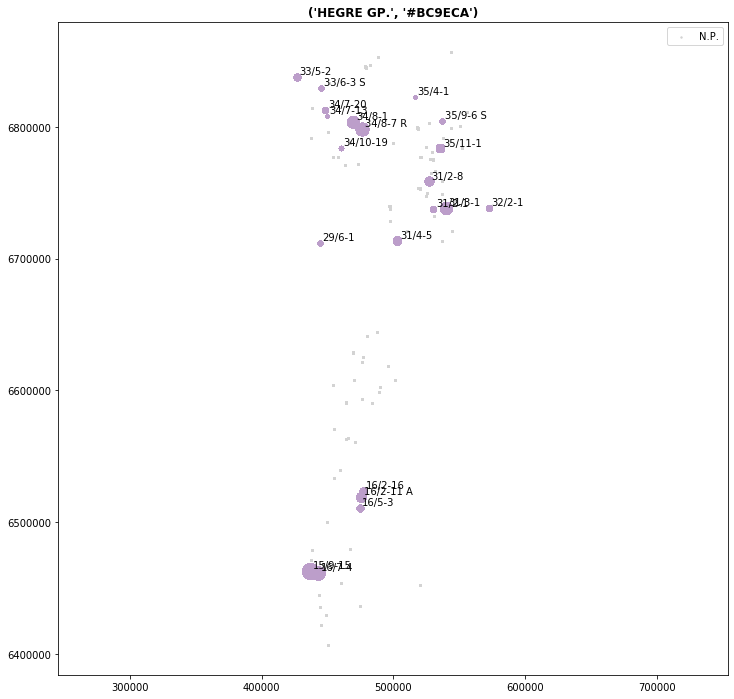

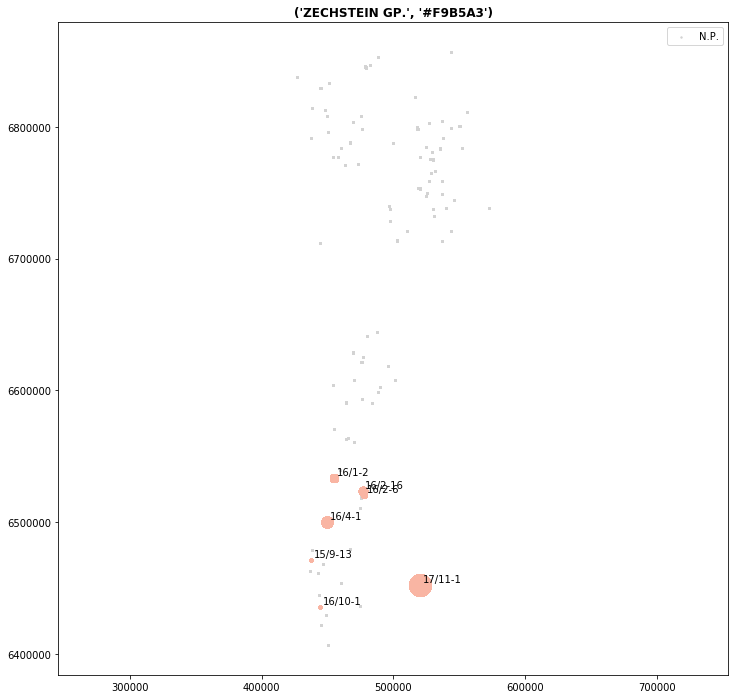

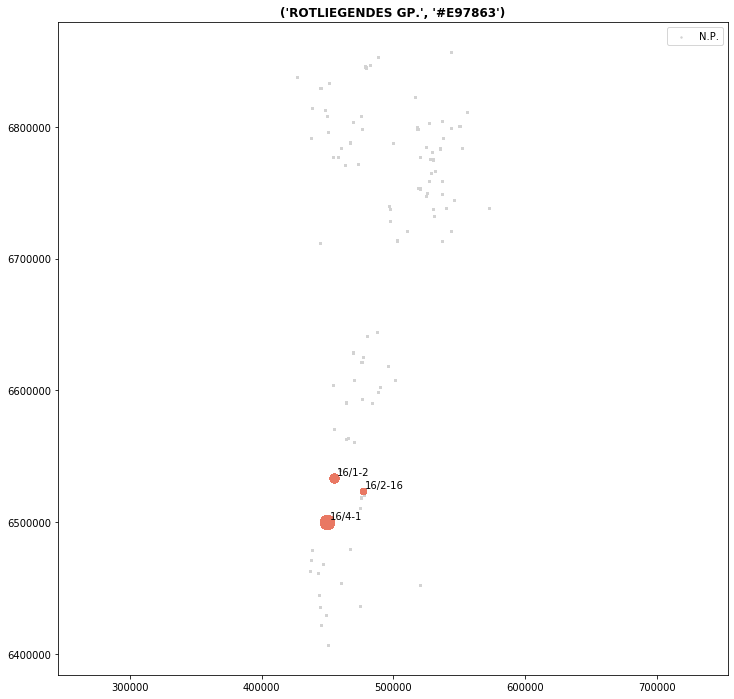

In [33]:
# plot where GROUPs occur geospatially
offset=2000

for gp in group_dict.values():
    fig = plt.figure(figsize=(12,12))
    plt.scatter(df.X_LOC,df.Y_LOC,marker='.',s=8,c='lightgrey',label='N.P.')
    
    for w in df.WELL[df.GROUP==gp[0]].unique():
        plt.scatter(df.X_LOC.loc[((df.GROUP==gp[0])&(df.WELL==w))],
                    df.Y_LOC.loc[((df.GROUP==gp[0])&(df.WELL==w))],
                    c=gp[1],s=len(df.loc[((df.GROUP==gp[0])&(df.WELL==w))])/10,
                    label=None)
    for w in df.WELL.loc[(df.GROUP==gp[0])].unique():
        plt.annotate(w,
                     xy=(df.X_LOC.loc[((df.GROUP==gp[0])&(df.WELL==w))].mean()+offset,
                         df.Y_LOC.loc[((df.GROUP==gp[0])&(df.WELL==w))].mean()+offset),
                     xytext=(df.X_LOC.loc[((df.GROUP==gp[0])&(df.WELL==w))].mean()+offset,
                             df.Y_LOC.loc[((df.GROUP==gp[0])&(df.WELL==w))].mean()+offset))
    plt.title(gp,fontweight='bold')
    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.savefig(f'spatial_distribution_group_{gp[0]}.png')
    plt.show()

In [14]:
print('Lithologies per GROUP:')
for gp in df.GROUP.dropna().unique():
    print(f'{gp:>16}: {sorted(df.FORCE_2020_LITHOFACIES_LITHOLOGY.loc[(df.GROUP==gp)].unique())}')

Lithologies per GROUP:
    NORDLAND GP.: [30000, 65000, 65030, 70000, 80000, 90000]
   HORDALAND GP.: [30000, 65000, 65030, 70000, 74000, 80000, 99000]
    ROGALAND GP.: [30000, 65000, 65030, 70000, 70032, 74000, 80000, 99000]
    SHETLAND GP.: [30000, 65000, 65030, 70000, 70032, 74000, 80000, 86000]
CROMER KNOLL GP.: [30000, 65000, 65030, 70000, 70032, 74000, 80000, 90000]
      VIKING GP.: [30000, 65000, 65030, 70000, 74000, 80000, 90000]
    VESTLAND GP.: [30000, 65000, 65030, 70000, 74000, 88000, 90000]
   ZECHSTEIN GP.: [30000, 65000, 65030, 70000, 74000, 80000, 86000, 88000]
       HEGRE GP.: [30000, 65000, 65030, 70000, 80000, 90000]
ROTLIEGENDES GP.: [30000, 65000, 65030, 70000, 93000]
        TYNE GP.: [30000, 65000, 65030, 70000]
   BOKNFJORD GP.: [30000, 65000, 65030, 70000, 74000, 80000, 86000]
      DUNLIN GP.: [30000, 65000, 65030, 70000, 74000, 80000, 90000]
        BAAT GP.: [30000, 65000, 65030, 70000, 74000, 80000, 90000]


In [15]:
print('Lithologies per GROUP:')
for gp in df.GROUP.dropna().unique():
    print(f'-------- {gp} ---')
    for li in df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.GROUP==gp].unique():
        print(f'{li} -- {litho_dict[li][0]:<15}: {100*len(df.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.GROUP==gp))])/len(df.loc[(df.GROUP==gp)]):>4.1f}%')
    print('')

Lithologies per GROUP:
-------- NORDLAND GP. ---
65000 -- Shale          : 55.8%
30000 -- Sandstone      : 27.7%
65030 -- Sandstone/Shale: 15.9%
70000 -- Limestone      :  0.2%
80000 -- Marl           :  0.0%
90000 -- Coal           :  0.4%

-------- HORDALAND GP. ---
65000 -- Shale          : 82.4%
30000 -- Sandstone      :  7.7%
65030 -- Sandstone/Shale:  8.2%
70000 -- Limestone      :  1.2%
99000 -- Tuff           :  0.2%
80000 -- Marl           :  0.1%
74000 -- Dolomite       :  0.2%

-------- ROGALAND GP. ---
30000 -- Sandstone      : 17.0%
99000 -- Tuff           : 11.1%
65000 -- Shale          : 61.9%
70000 -- Limestone      :  2.7%
65030 -- Sandstone/Shale:  5.9%
80000 -- Marl           :  1.3%
74000 -- Dolomite       :  0.0%
70032 -- Chalk          :  0.0%

-------- SHETLAND GP. ---
70000 -- Limestone      : 16.9%
80000 -- Marl           :  7.6%
65000 -- Shale          : 61.3%
70032 -- Chalk          :  4.5%
30000 -- Sandstone      :  1.0%
65030 -- Sandstone/Shale:  8.5%
74000

In [16]:
print('Confidence: 1=high, 2=medium, 3=low\n')

print('Lithologies per GROUP:')
for gp in df.GROUP.dropna().unique():
    print(f'-------- {gp} ---')
    for li in df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.GROUP==gp].unique():
        print(f'{li} -- {litho_dict[li][0]:<15}: {100*len(df.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.GROUP==gp))])/len(df.loc[(df.GROUP==gp)]):>4.1f}%. Average confidence lithology: {df.FORCE_2020_LITHOFACIES_CONFIDENCE[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li][df.GROUP==gp].mean():>5.3f} ± {df.FORCE_2020_LITHOFACIES_CONFIDENCE[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li][df.GROUP==gp].std():>5.3f} (±1 stdev)')  
    print('')

Confidence: 1=high, 2=medium, 3=low

Lithologies per GROUP:
-------- NORDLAND GP. ---
65000 -- Shale          : 55.8%. Average confidence lithology: 1.082 ± 0.304 (±1 stdev)
30000 -- Sandstone      : 27.7%. Average confidence lithology: 1.097 ± 0.386 (±1 stdev)
65030 -- Sandstone/Shale: 15.9%. Average confidence lithology: 1.382 ± 0.685 (±1 stdev)
70000 -- Limestone      :  0.2%. Average confidence lithology: 1.000 ± 0.000 (±1 stdev)
80000 -- Marl           :  0.0%. Average confidence lithology: 1.000 ± 0.000 (±1 stdev)
90000 -- Coal           :  0.4%. Average confidence lithology: 1.093 ± 0.290 (±1 stdev)

-------- HORDALAND GP. ---
65000 -- Shale          : 82.4%. Average confidence lithology: 1.107 ± 0.384 (±1 stdev)
30000 -- Sandstone      :  7.7%. Average confidence lithology: 1.024 ± 0.165 (±1 stdev)
65030 -- Sandstone/Shale:  8.2%. Average confidence lithology: 1.302 ± 0.499 (±1 stdev)
70000 -- Limestone      :  1.2%. Average confidence lithology: 1.156 ± 0.435 (±1 stdev)
99000 

65000 -- Shale          : 23.4%. Average confidence lithology: 1.053 ± 0.223 (±1 stdev)
65030 -- Sandstone/Shale: 30.5%. Average confidence lithology: 1.089 ± 0.302 (±1 stdev)
90000 -- Coal           :  4.6%. Average confidence lithology: 1.078 ± 0.268 (±1 stdev)
80000 -- Marl           :  0.4%. Average confidence lithology: 1.075 ± 0.264 (±1 stdev)
70000 -- Limestone      :  1.3%. Average confidence lithology: 1.351 ± 0.478 (±1 stdev)
74000 -- Dolomite       :  0.0%. Average confidence lithology: 1.000 ± 0.000 (±1 stdev)



In [17]:
pd.set_option('max_rows',100)
print('Confidence: 1=high, 2=medium, 3=low')
df.loc[:,['FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE','GROUP', 'FORMATION']].\
       groupby(by=['FORCE_2020_LITHOFACIES_LITHOLOGY','GROUP']).describe()

Confidence: 1=high, 2=medium, 3=low


FORCE_2020_LITHOFACIES_CONFIDENCE  \
                                                                              count   
FORCE_2020_LITHOFACIES_LITHOLOGY GROUP                                                
30000                            BAAT GP.                                   14283.0   
                                 BOKNFJORD GP.                                467.0   
                                 CROMER KNOLL GP.                            4193.0   
                                 DUNLIN GP.                                 27483.0   
                                 HEGRE GP.                                   4603.0   
                                 HORDALAND GP.                              22532.0   
                                 NORDLAND GP.                               30886.0   
                                 ROGALAND GP.                               22387.0   
                                 ROTLIEGENDES GP.                            1979.0   
                                 SHETLAND GP.                                2441.0   
                                 TYNE GP.                                      21.0   
                                 VESTLAND GP.                               11500.0   
                                 VIKING GP.                                 25985.0   
                                 ZECHSTEIN GP.                                 65.0   
65000                            BAAT GP.                                    8367.0   
                                 BOKNFJORD GP.                               2267.0   
                                 CROMER KNOLL GP.                           27525.0   
                                 DUNLIN GP.                                 64679.0   
                                 HEGRE GP.                                   5146.0   
                                 HORDALAND GP.                             241562.0   
                                 NORDLAND GP.                               62221.0   
                                 ROGALAND GP.                               81710.0   
                                 ROTLIEGENDES GP.                             368.0   
                                 SHETLAND GP.                              143427.0   
                                 TYNE GP.                                     980.0   
                                 VESTLAND GP.                               10266.0   
                                 VIKING GP.                                 69599.0   
                                 ZECHSTEIN GP.                               1425.0   
65030                            BAAT GP.                                   10914.0   
                                 BOKNFJORD GP.                                339.0   
                                 CROMER KNOLL GP.                            4915.0   
                                 DUNLIN GP.                                 24568.0   
                                 HEGRE GP.                                   4008.0   
                                 HORDALAND GP.                              23992.0   
                                 NORDLAND GP.                               17701.0   
                                 ROGALAND GP.                                7782.0   
                                 ROTLIEGENDES GP.                             328.0   
                                 SHETLAND GP.                               19954.0   
                                 TYNE GP.                                     199.0   
                                 VESTLAND GP.                                3286.0   
                                 VIKING GP.                                 32248.0   
                                 ZECHSTEIN GP.                                151.0   
70000                            BAAT GP.                                     465.0   
                                 BOKNFJORD GP.  

In [18]:
pd.set_option('max_rows',100)
print('Confidence: 1=high, 2=medium, 3=low')
df.loc[:,['FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE','GROUP', 'FORMATION']].\
       groupby(by=['GROUP','FORCE_2020_LITHOFACIES_LITHOLOGY']).describe()

Confidence: 1=high, 2=medium, 3=low


FORCE_2020_LITHOFACIES_CONFIDENCE  \
                                                                              count   
GROUP            FORCE_2020_LITHOFACIES_LITHOLOGY                                     
BAAT GP.         30000                                                      14283.0   
                 65000                                                       8367.0   
                 65030                                                      10914.0   
                 70000                                                        465.0   
                 74000                                                          8.0   
                 80000                                                        147.0   
                 90000                                                       1638.0   
BOKNFJORD GP.    30000                                                        467.0   
                 65000                                                       2267.0   
                 65030                                                        339.0   
                 70000                                                         12.0   
                 74000                                                          9.0   
                 80000                                                          3.0   
                 86000                                                         28.0   
CROMER KNOLL GP. 30000                                                       4193.0   
                 65000                                                      27525.0   
                 65030                                                       4915.0   
                 70000                                                       3451.0   
                 70032                                                         23.0   
                 74000                                                         81.0   
                 80000                                                      12084.0   
                 90000                                                         25.0   
DUNLIN GP.       30000                                                      27483.0   
                 65000                                                      64679.0   
                 65030                                                      24568.0   
                 70000                                                       1355.0   
                 74000                                                         45.0   
                 80000                                                        222.0   
                 90000                                                        724.0   
HEGRE GP.        30000                                                       4603.0   
                 65000                                                       5146.0   
                 65030                                                       4008.0   
                 70000                                                         96.0   
                 80000                                                         38.0   
                 90000                                                          6.0   
HORDALAND GP.    30000                                                      22532.0   
                 65000                                                     241562.0   
                 65030                                                      23992.0   
                 70000                                                       3640.0   
                 74000                                                        654.0   
                 80000                                                        154.0   
                 99000                                                        586.0   
NORDLAND GP.     30000                                                      30886.0   
                 65000                          

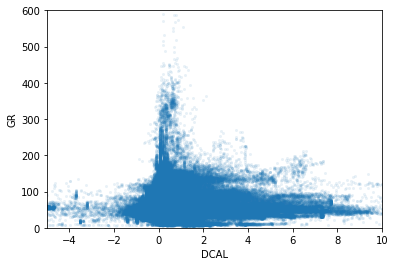

In [19]:
fig = plt.figure()
x = 'DCAL'
y = 'GR'
plt.scatter(df[x],df[y],alpha=0.1,marker='.',linewidth=0)
plt.xlim([-5,10])
plt.ylim([0,600])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

### Create a rudimentary map showing the well locations and print well names

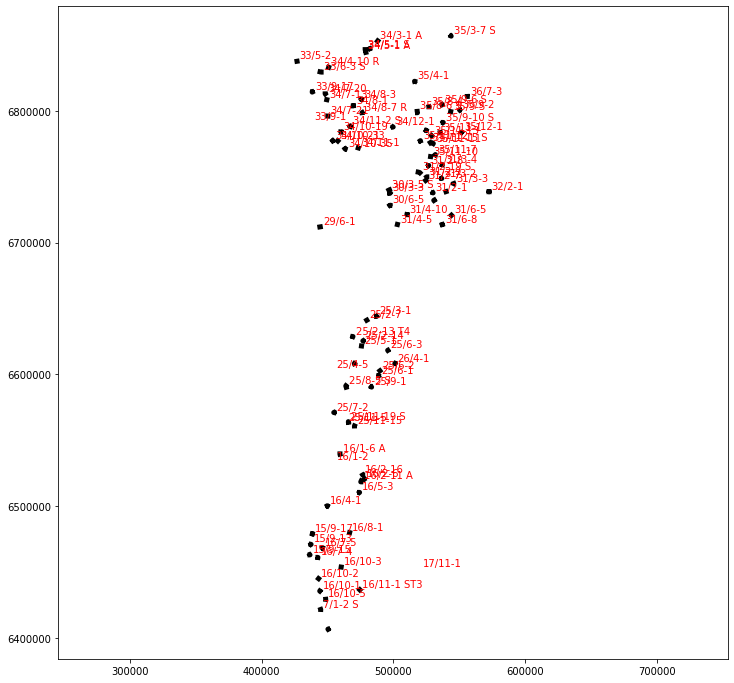

In [20]:
offset=2000
fig = plt.figure(figsize=(12,12))
for w in df.WELL.unique():
    plt.plot(df.X_LOC[df.WELL==w], df.Y_LOC[df.WELL==w],
             marker=None, linestyle='-', linewidth=5, color='k')
    plt.annotate(w,xy=(max(df.X_LOC[df.WELL==w])+offset, max(df.Y_LOC[df.WELL==w])+offset),
                 xytext=(max(df.X_LOC[df.WELL==w])+offset, max(df.Y_LOC[df.WELL==w])+offset),c='r')
plt.axis('equal')
plt.show()

In [21]:
print(f'{"LOG":>10}  {"BOUNDS":>20}  {"MISSING":>10}  {"PRESENT":>10}  \
{"<LBOUND":>10}  {">UBOUND":>10}  {"TOT. <+>":>10}  \n{"-"*111}')
for l in log_dict.keys()-['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 
                     'GROUP', 'FORMATION', 'X_LOC', 'Y_LOC', 'Z_LOC', 'SP', 'CALI', 'BS', 'DRHO', 'DCAL']:
    if log_dict[l][0] < log_dict[l][1]:
      lbound = log_dict[l][0]
      ubound = log_dict[l][1]
    else:
      lbound = log_dict[l][1]
      ubound = log_dict[l][0]
     
    outside_lbound = len(df[l][df[l]<lbound])/len(df[l].dropna())
    outside_ubound = len(df[l][df[l]>ubound])/len(df[l].dropna())
    print(f'\
{l:>10} [{lbound:>7.2f} - {ubound:>8.2f}]:  \
{df[l].isna().sum()/len(df[l]):>10.3f}  \
{df[l].notna().sum()/len(df[l]):>10.3f}  \
{outside_lbound:>10.3f}  \
{outside_ubound:>10.3f}  \
{outside_lbound+outside_ubound:>10.3f}')

       LOG                BOUNDS     MISSING     PRESENT     <LBOUND     >UBOUND    TOT. <+>  
---------------------------------------------------------------------------------------------------------------
       DTC [  40.00 -   140.00]:       0.069       0.931       0.000       0.260       0.260
       DTS [  40.00 -   400.00]:       0.851       0.149       0.000       0.030       0.030
      RDEP [   0.20 -  2000.00]:       0.009       0.991       0.001       0.000       0.001
      RMED [   0.20 -  2000.00]:       0.033       0.967       0.001       0.000       0.001
      RMIC [   0.20 -  2000.00]:       0.850       0.150       0.005       0.000       0.005
      RSHA [   0.20 -  2000.00]:       0.461       0.539       0.004       0.000       0.004
       ROP [   0.00 -   150.00]:       0.543       0.457       0.000       0.033       0.033
      RHOB [   1.70 -     2.95]:       0.138       0.862       0.016       0.000       0.016
       RXO [   0.20 -  2000.00]:       0.720     

In [22]:
# make some "quality logs"
df['GAUGE'] = df['BS'][df.BS.notna()][df.CALI.notna()] - df['CALI'][df.BS.notna()][df.CALI.notna()] 
df['BADHOLE'] = [0 if (abs(g)<1.5 and abs(d)<0.25) else 1 for g,d in zip(df.GAUGE, df.DRHO)]

In [23]:
print(len(df.GAUGE))
print(len(df.GAUGE.dropna()))
print(len(df.GAUGE[df.GAUGE<-2]))
print(len(df.GAUGE[df.GAUGE>=0]))
print(len(df.GAUGE[df.GAUGE>=-2][df.GAUGE<0]))

1170511
657745
71525
155743
430477


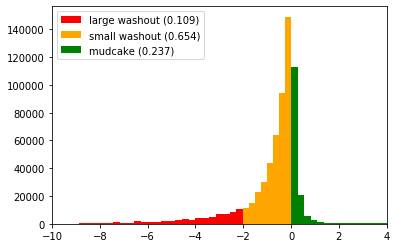

In [24]:
plt.hist(df.GAUGE.loc[(df.GAUGE<-2)],color='r', label=f'large washout ({len(df.GAUGE.loc[(df.GAUGE<-2)])/len(df.GAUGE.dropna()):5.3f})',bins=60)
plt.hist(df.GAUGE.loc[(df.GAUGE>=-2)][df.GAUGE<0],color='orange', label=f'small washout ({len(df.GAUGE.loc[((df.GAUGE>=-2)&(df.GAUGE<0))])/len(df.GAUGE.dropna()):5.3f})', bins=8)
plt.hist(df.GAUGE.loc[(df.GAUGE>=0)],color='g', label=f'mudcake ({len(df.GAUGE.loc[(df.GAUGE>=0)])/len(df.GAUGE.dropna()):5.3f})', bins=32)
plt.xlim([-10,4])
plt.legend(loc='best')
plt.show()

C:\Appl\anaconda3\envs\play\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Appl\anaconda3\envs\play\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


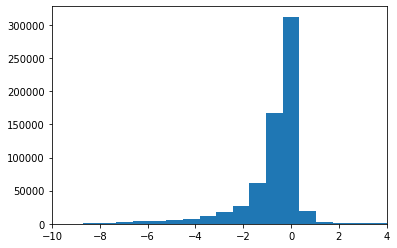

In [25]:
plt.hist(df.GAUGE, bins=40)
plt.xlim([-10,4])
plt.show()

In [26]:
print(f'Large density corrections: {len(df.DRHO[abs(df.DRHO)>0.25])} ({len(df.DRHO[abs(df.DRHO)>0.25])/len(df.DRHO.dropna()):5.3f}), \
small density corrections: {len(df.DRHO[abs(df.DRHO)<=0.25])} ({len(df.DRHO[abs(df.DRHO)<=0.25])/len(df.DRHO.dropna()):5.3f})\
')

Large density corrections: 14007 (0.014), small density corrections: 973850 (0.986)
